In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import requests

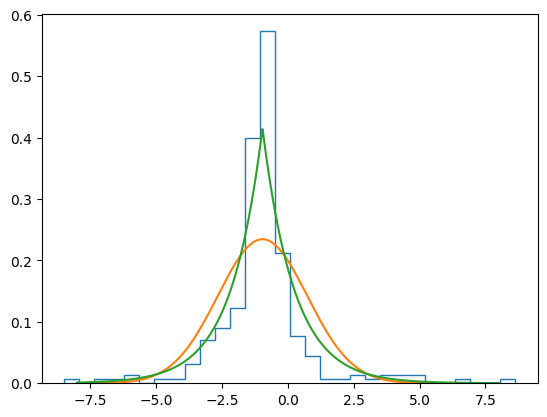

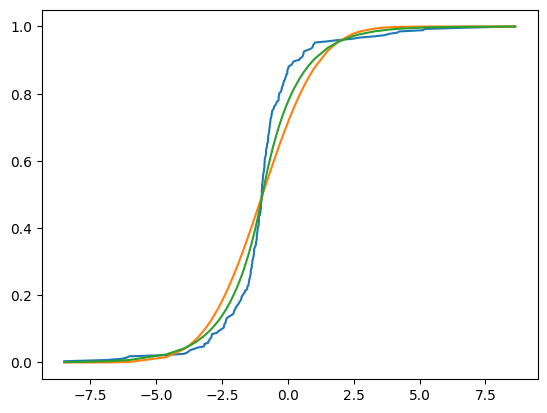

KS statistic, normal: 0.16299427979121062
KS statistic, laplace: 0.11638852102049158
LL, normal: -530.2867283928192
LL, laplace: -458.8780889794002
Bayes factor = exp(ll_laplace-ll_normal): 1.028911585689075e+31


In [183]:
df = pd.read_excel("~/Downloads/data.xlsx", index_col=0)
A = df.values.flatten()
for i in range(len(A)):
    if type(A[i])!=str and np.isnan(A[i]):
        A[i] = 0.
    else:
        A[i] = float(A[i].split(" ")[0])

A = A.astype(np.float64)
A = A[A!=0]

x = np.linspace(-8, 8, 1000)

plt.hist(A, 30, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A.mean(), A.std()))
plt.plot(x, st.laplace.pdf(x, A.mean(), A.std()/2**0.5))
plt.show()

plt.plot(np.sort(A), (np.arange(len(A))+1)/len(A))

plt.plot(np.sort(A), st.norm.cdf(np.sort(A), A.mean(), A.std()))
plt.plot(np.sort(A), st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A))+1)/len(A)-st.norm.cdf(np.sort(A), A.mean(), A.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A))+1)/len(A)-st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5)).max())

ll_norm = -((A-A.mean())**2/(2*A.var())).sum()-0.5*len(A)*np.log(2*np.pi*A.var())
ll_laplace = -(np.abs(A-A.mean())/(A.std()/2**0.5)).sum()-len(A)*np.log(A.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_laplace-ll_normal):", np.exp(-ll_norm+ll_laplace))

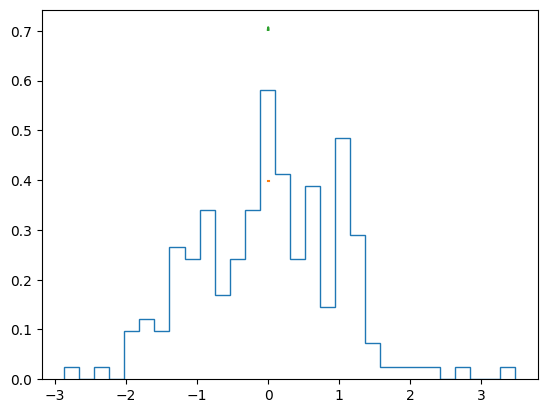

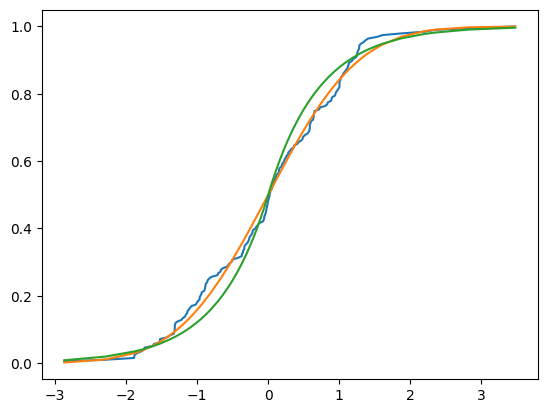

KS statistic, normal: 0.04947409743814235
KS statistic, laplace: 0.09696720538100465
LL, normal: -276.6930139749112
LL, laplace: -286.2560982837491
Bayes factor = exp(ll_laplace-ll_normal): 7.027571205336259e-05


In [133]:
dsets = ["DA", "DB", " M3", " F4"]
A = []
for d in dsets:
    df = pd.read_excel("~/Downloads/40168_2019_729_MOESM2_ESM.xlsx", sheet_name=f"GLVM parameters of {d}")
    inters = df[df["Parameter type"]=="interaction"]["Value"].values
    A.append((inters-inters.mean())/inters.std())
    # A.append(inters)
A = np.concatenate(A)

x = np.linspace(-0.005, 0.005, 1000)

plt.hist(A, 30, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A.mean(), A.std()))
plt.plot(x, st.laplace.pdf(x, A.mean(), A.std()/2**0.5))
plt.show()

plt.plot(np.sort(A), (np.arange(len(A))+1)/len(A))

plt.plot(np.sort(A), st.norm.cdf(np.sort(A), A.mean(), A.std()))
plt.plot(np.sort(A), st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A))+1)/len(A)-st.norm.cdf(np.sort(A), A.mean(), A.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A))+1)/len(A)-st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5)).max())

ll_norm = -((A-A.mean())**2/(2*A.var())).sum()-0.5*len(A)*np.log(2*np.pi*A.var())
ll_laplace = -(np.abs(A-A.mean())/(A.std()/2**0.5)).sum()-len(A)*np.log(A.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_laplace-ll_normal):", np.exp(-ll_norm+ll_laplace))

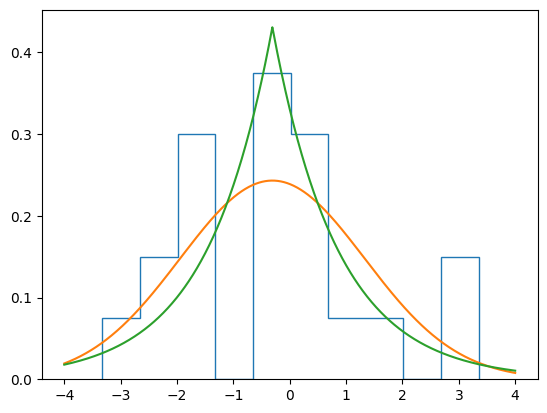

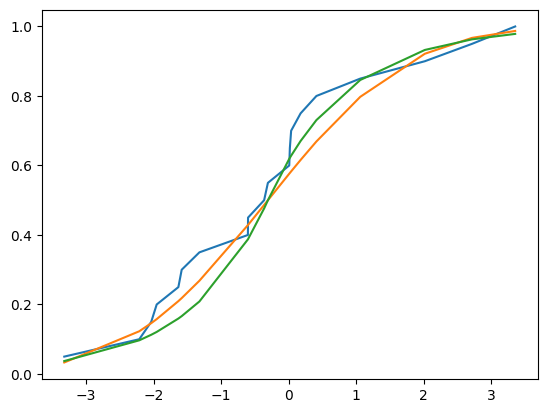

KS statistic, normal: 0.13408206262775857
KS statistic, laplace: 0.1413972847588034
LL, normal: -38.283675527965215
LL, laplace: -38.477998883167956
Bayes factor = exp(ll_laplace-ll_normal): 0.8233916132555655


In [62]:
A = np.array([float(i) for i in """-1.997 -2.212 -2.035 2.713 0.176 1.573 0.464
0.008 -3.957 -1.954 3.352 -0.602 0.768 0.167
-0.364 -1.633 -5.481 1.059 -0.604 1.290 0.376
-0.308 0.036 0.017 -10.371 0.410 0.761 0.262
-1.322 -1.584 -3.322 2.015 -8.984 1.795 0.564""".replace("\n", " ").split(" ")]).reshape((5,7))[:,:-2]
A = A-A*np.eye(5)
A = A[A!=0]

A = A.flatten()

x = np.linspace(-4, 4, 1000)
# plt.hist(A, 30, histtype="step", density=True)

# x = np.linspace(-0.2, 0.2, 1000)
# A = A[A!=0.]
# A = A[np.abs(A)<0.3]
plt.hist(A, 10, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A.mean(), A.std()))
plt.plot(x, st.laplace.pdf(x, A.mean(), A.std()/2**0.5))
plt.show()

plt.plot(np.sort(A), (np.arange(len(A))+1)/len(A))

plt.plot(np.sort(A), st.norm.cdf(np.sort(A), A.mean(), A.std()))
plt.plot(np.sort(A), st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A))+1)/len(A)-st.norm.cdf(np.sort(A), A.mean(), A.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A))+1)/len(A)-st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5)).max())

ll_norm = -((A-A.mean())**2/(2*A.var())).sum()-0.5*len(A)*np.log(2*np.pi*A.var())
ll_laplace = -(np.abs(A-A.mean())/(A.std()/2**0.5)).sum()-len(A)*np.log(A.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_laplace-ll_normal):", np.exp(-ll_norm+ll_laplace))

In [8]:
A = pd.read_excel("~/Downloads/pbio.3001116.s006.xlsx", sheet_name="microbiome_interactions", index_col=0).values
np.diag(A)

array([ 0.        ,  0.        ,  0.        ,  0.        , -0.05357004,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.05158012, -0.01966001,  0.0185428 ,  0.        , -0.08369499,
        0.        ,  0.        ,  0.        ])

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   5.,   8.,  22., 216.,  29.,  23.,   2.,   3.,   3.,
          4.,   0.,   1.,   0.,   1.,   1.,   0.,   1.]),
 array([-0.37320686, -0.3511678 , -0.32912874, -0.30708968, -0.28505063,
        -0.26301157, -0.24097251, -0.21893345, -0.19689439, -0.17485534,
        -0.15281628, -0.13077722, -0.10873816, -0.08669911, -0.06466005,
        -0.04262099, -0.02058193,  0.00145713,  0.02349618,  0.04553524,
         0.0675743 ,  0.08961336,  0.11165242,  0.13369147,  0.15573053,
         0.17776959,  0.19980865,  0.2218477 ,  0.24388676,  0.26592582,
         0.28796488]),
 <BarContainer object of 30 artists>)

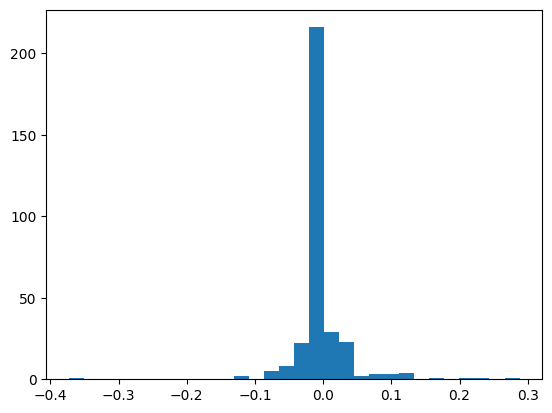

In [10]:
plt.hist(A.flatten(), 30)

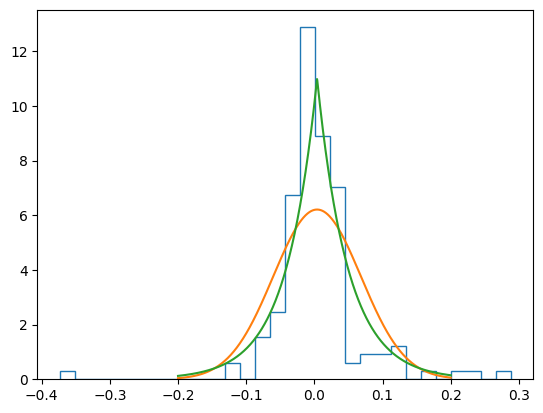

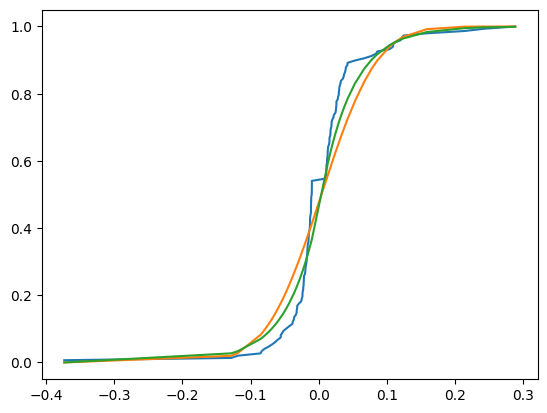

KS statistic, normal: 0.1674960102514016
KS statistic, laplace: 0.173540173367199
LL, normal: 196.25594474601695
LL, laplace: 224.47143837837365
Bayes factor = exp(ll_laplace-ll_normal): 1794044407057.628


In [30]:
A = pd.read_excel("~/Downloads/pbio.3001116.s006.xlsx", sheet_name="microbiome_interactions", index_col=0).values
n_sp = A.shape[0]
A = np.array([i for i in A.flatten() if not np.isnan(i)])

x = np.linspace(-4, 4, 1000)
# plt.hist(A, 30, histtype="step", density=True)

x = np.linspace(-0.2, 0.2, 1000)
A = A[A!=0.]
# A = A[np.abs(A)<0.3]
plt.hist(A, 30, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A.mean(), A.std()))
plt.plot(x, st.laplace.pdf(x, A.mean(), A.std()/2**0.5))
plt.show()

plt.plot(np.sort(A), (np.arange(len(A))+1)/len(A))

plt.plot(np.sort(A), st.norm.cdf(np.sort(A), A.mean(), A.std()))
plt.plot(np.sort(A), st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A))+1)/len(A)-st.norm.cdf(np.sort(A), A.mean(), A.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A))+1)/len(A)-st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5)).max())

ll_norm = -((A-A.mean())**2/(2*A.var())).sum()-0.5*len(A)*np.log(2*np.pi*A.var())
ll_laplace = -(np.abs(A-A.mean())/(A.std()/2**0.5)).sum()-len(A)*np.log(A.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_laplace-ll_normal):", np.exp(-ll_norm+ll_laplace))

In [126]:
p = pd.read_csv("https://raw.githubusercontent.com/zavalab/JuliaBox/master/MicrobialPLOS/output/pips_S1/param.csv", header=None).values

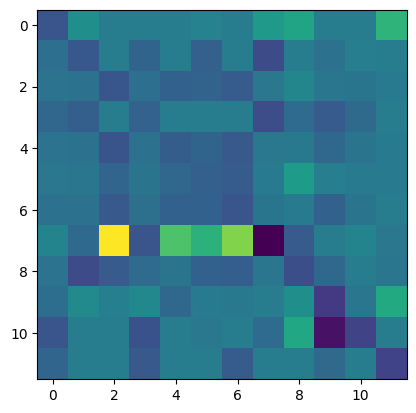

In [140]:
A_true = np.array([float(i) for i in " ".join("""-0.912 0.453 0 0 0 0.137 0 0.692 0.961 0 0 1.343;                                      
     -0.306 -0.829 0 -0.56 0 -0.657 0 -1.098 0 -0.241 0.042 0;
     -0.228 -0.261 -0.88 -0.324 -0.632 -.584 -0.754 -0.124 0.231 -0.151 -0.176 -0.061;
     -0.529 -0.671 0 -0.622 0 0 0 -1.077 -0.402 -0.771 -0.433 0;
     -0.215 -0.278 -0.921 -0.265 -0.734 -0.556 -0.819 -0.114 -0.099 -0.465 -0.203 -0.020;
     -0.129 -0.168 -0.55 -0.202 -0.515 -0.66 -0.755 -0.049 0.759 0.039 -0.026 -0.030;
     -0.272 -0.274 -0.816 -0.303 -0.624 -0.642 -0.907 -0.169 -0.069 -0.632 -0.2 0;
     0.176 -0.448 3.378 -0.904 1.757 1.303 2.272 -2.442 -0.768 0.024 0.176 -0.139;
     -0.231 -1.121 -0.782 -0.405 -0.209 -0.638 -0.703 -0.153 -1.038 -0.507 0 -0.168;
     -0.348 0.312 0.066 0.265 -0.507 -0.047 -0.086 0 0.448 -1.454 -0.151 1.083;
     -0.9 0 0 -0.977 0 -0.106 0 -.408 1.015 -2.157 -1.254 0;
     -0.546 0 0 -0.817 0 0 -0.738 0 0 -0.439 0 -1.271""".replace(";","").split("\n")).split(" ") if i!=""]).reshape((n_sp,n_sp))

plt.imshow(A_true)

In [141]:
p.reshape((n_sp,n_sp+1))[:,0]

array([0.20775257, 0.2201873 , 0.34505625, 0.25881027, 0.39313397,
       0.15420571, 0.29165146, 0.51359356, 0.20710299, 0.3089477 ,
       0.31034274, 0.18921268])

In [142]:
n_sp = int(p.shape[0]**0.5)

In [73]:
A

array([-4.5  , -4.1  , -4.7  , -4.5  , -4.4  , -4.5  , -4.3  , -4.2  ,
       -4.3  , -4.3  ,  3.5  ,  3.1  ,  4.   ,  3.6  ,  3.5  ,  3.4  ,
        3.1  ,  3.   ,  3.   , -2.3  , -2.4  , -2.1  , -2.1  , -2.   ,
       -2.1  , -2.1  , -2.2  , -2.2  , 12.   ,  9.8  , 10.   , 11.   ,
       10.   , 10.   , 11.   , 11.   , -4.   , -3.6  , -3.   ,  1.9  ,
        1.8  ,  2.   ,  1.8  ,  1.8  ,  1.6  ,  1.7  ,  1.7  ,  5.5  ,
        4.9  ,  4.3  , -0.06 , -0.068, -0.084, -0.083, -0.092, -0.082,
       -0.091, -0.11 ,  0.45 ,  0.31 ,  0.29 ,  0.34 ,  0.39 ,  0.47 ,
        0.56 ,  0.54 ,  0.51 , -1.   , -0.89 , -0.82 , -0.74 , -0.88 ,
       -0.82 , -0.76 , -1.5  , -1.3  , -1.2  , -1.2  , -1.2  , -1.   ,
       -1.1  , -1.1  ,  0.96 ,  1.   ,  0.94 ,  0.96 ,  0.85 , -0.13 ,
       -0.13 , -0.13 , -0.14 , -0.13 , -0.13 ,  0.23 ,  0.2  ,  0.19 ,
        0.64 ])

In [77]:
np.array([i for i in df.iloc[:-2,2:].values]).shape

(20, 10)

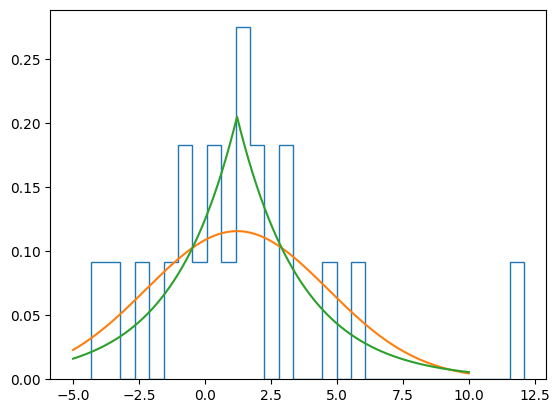

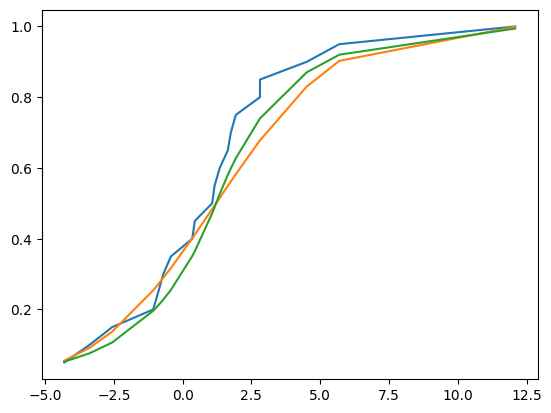

KS statistic, normal: 0.1717791396967061
KS statistic, laplace: 0.12268745790345825
LL, normal: -53.157818500309695
LL, laplace: -51.09193937912153
Bayes factor = exp(ll_laplace-ll_normal): 7.892233078097123


In [92]:
df = pd.read_excel("~/Downloads/Table 2.XLSX")
A = df["Strength_MetaMIS"].values

x = np.linspace(-4, 4, 1000)
# plt.hist(A, 30, histtype="step", density=True)

x = np.linspace(-5, 10, 1000)
# A = A-A*np.eye()
# A = A[A!=0.]
plt.hist(A, 30, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A.mean(), A.std()))
plt.plot(x, st.laplace.pdf(x, A.mean(), A.std()/2**0.5))
plt.show()

plt.plot(np.sort(A), (np.arange(len(A))+1)/len(A))

plt.plot(np.sort(A), st.norm.cdf(np.sort(A), A.mean(), A.std()))
plt.plot(np.sort(A), st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A))+1)/len(A)-st.norm.cdf(np.sort(A), A.mean(), A.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A))+1)/len(A)-st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5)).max())

ll_norm = -((A-A.mean())**2/(2*A.var())).sum()-0.5*len(A)*np.log(2*np.pi*A.var())
ll_laplace = -(np.abs(A-A.mean())/(A.std()/2**0.5)).sum()-len(A)*np.log(A.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_laplace-ll_normal):", np.exp(-ll_norm+ll_laplace))

In [143]:
A = p.reshape((n_sp,n_sp+1))[:,1:]
# A = A-A*np.eye(n_sp)
# A = A[A!=0]
# A = A.flatten()

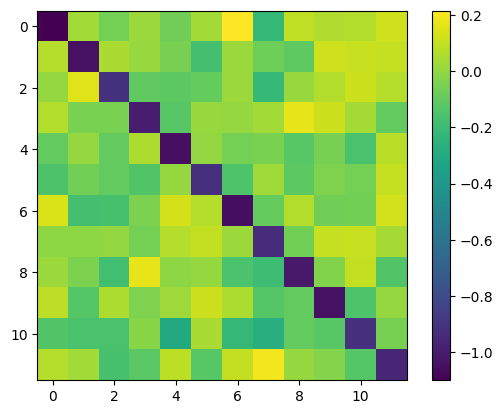

In [144]:
plt.imshow(A)
plt.colorbar()
plt.show()

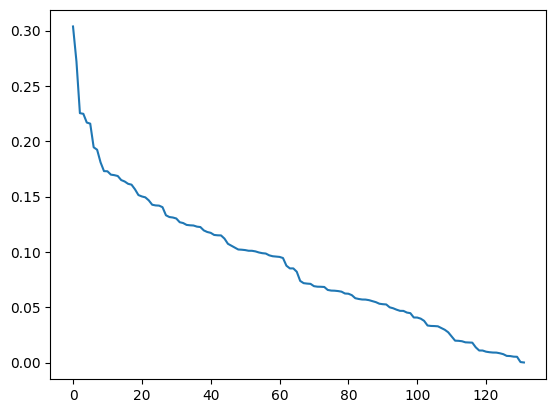

In [163]:
plt.plot(np.sort(np.abs(A2))[::-1])

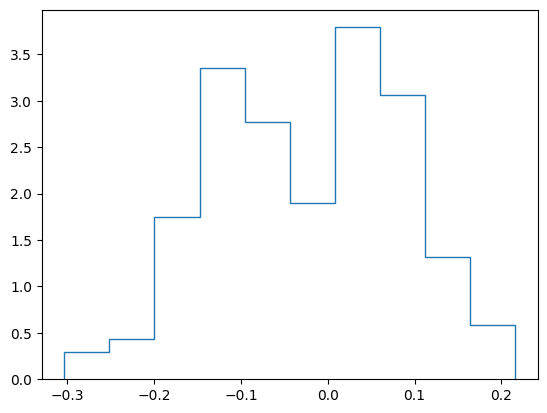

In [158]:
A2 = A-A*np.eye(n_sp)
A2 = A2[A2!=0]
# plt.hist(A.flatten(), histtype="step", density=True)
plt.hist(A2.flatten(), histtype="step", density=True)
plt.show()

In [164]:
A3 = A.copy()
A3[np.abs(A3)<0.1] = 0

In [169]:
(np.sign(A3)==np.sign(A_true)).mean()

0.375

In [ ]:
(np.sign(A[A_true!=0])==np.sign(A_true[A_true!=0])).mean()

0.6106194690265486

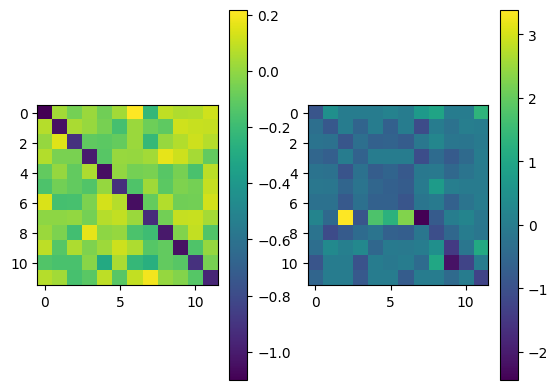

In [171]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(A)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(A_true)
plt.colorbar()
plt.show()

In [123]:
A = A.flatten()

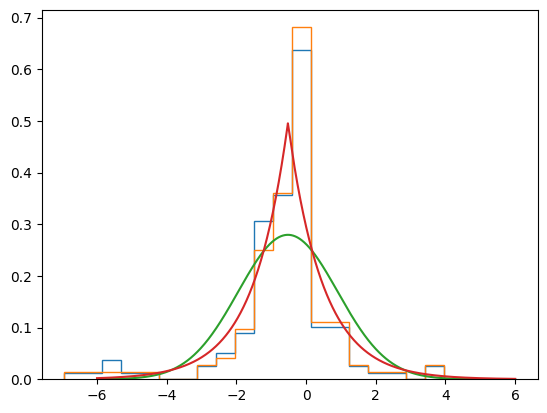

In [124]:
x = np.linspace(-4, 4, 1000)
plt.hist(A, 20, histtype="step", density=True)
# plt.plot(x, st.norm.pdf(x, A.mean(), A.std()))
# plt.plot(x, st.laplace.pdf(x, A.mean(), A.std()/2**0.5))
# plt.show()

A = p.reshape((n_sp,n_sp+1))[:,1:]
A = A-A*np.eye(n_sp)
A = A[A!=0]
A = A.flatten()

x = np.linspace(-6, 6, 1000)
plt.hist(A, 20, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A.mean(), A.std()))
plt.plot(x, st.laplace.pdf(x, A.mean(), A.std()/2**0.5))
plt.show()

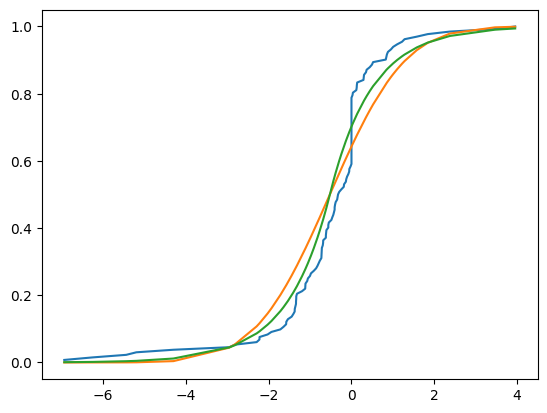

KS statistic, normal: 0.1549414110062114
KS statistic, laplace: 0.1210300366620849
LL, normal: -234.20618513490228
LL, laplace: -211.88847165525087
Bayes factor = exp(ll_laplace-ll_normal): 4925607625.278707


In [125]:
plt.plot(np.sort(A), (np.arange(len(A))+1)/len(A))

plt.plot(np.sort(A), st.norm.cdf(np.sort(A), A.mean(), A.std()))
plt.plot(np.sort(A), st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A))+1)/len(A)-st.norm.cdf(np.sort(A), A.mean(), A.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A))+1)/len(A)-st.laplace.cdf(np.sort(A), A.mean(), A.std()/2**0.5)).max())

ll_norm = -((A-A.mean())**2/(2*A.var())).sum()-0.5*len(A)*np.log(2*np.pi*A.var())
ll_laplace = -(np.abs(A-A.mean())/(A.std()/2**0.5)).sum()-len(A)*np.log(A.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_laplace-ll_normal):", np.exp(-ll_norm+ll_laplace))

In [134]:
df = pd.read_excel("~/Downloads/Dataset_S1.xlsx", sheet_name="MmuE", index_col=0)

/home/valeriano/.virtualenvs/base/lib64/python3.10/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


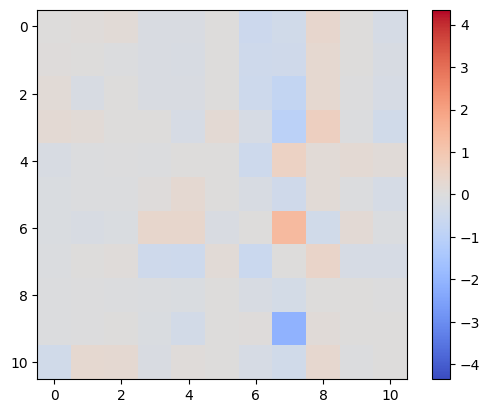

In [135]:
A_ = df.values[1:-1,:-2].astype(np.float64)
plt.imshow(A_*(1-np.eye(A_.shape[0])), cmap="coolwarm", vmin=-np.abs(A_).max(), vmax=np.abs(A_).max())
plt.colorbar()
plt.show()

In [136]:
A_cross_int = (A_-A_*np.eye(A_.shape[0])).flatten()
A_cross_int = A_cross_int[A_cross_int!=0]

(array([0.02607834, 0.        , 0.        , 0.05215668, 0.36509675,
        1.22568195, 1.01705523, 0.15647004, 0.        , 0.02607834]),
 array([-2.0963, -1.7477, -1.3991, -1.0505, -0.7019, -0.3533, -0.0047,
         0.3439,  0.6925,  1.0411,  1.3897]),
 <BarContainer object of 10 artists>)

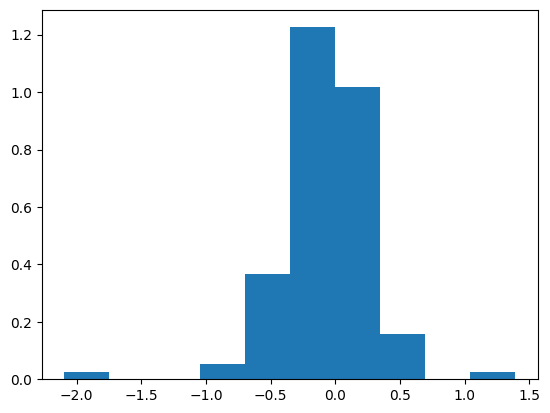

In [137]:
plt.hist(A_cross_int, density=True)

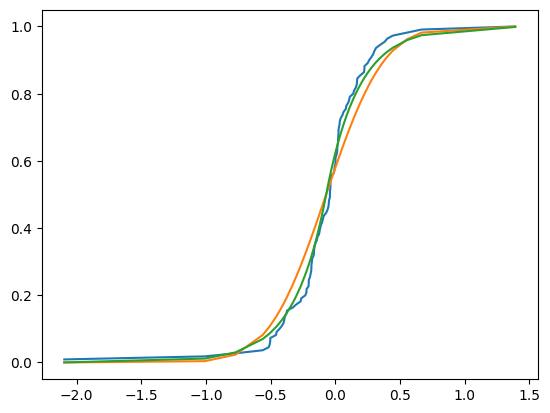

KS statistic, normal: 0.12396260740234638
KS statistic, laplace: 0.06983341137840382
LL, normal: -41.367472990511025
LL, laplace: -22.74398016466006
Bayes factor = exp(ll_normal-ll_laplace): 8.164316492965581e-09


In [138]:
plt.plot(np.sort(A_cross_int), (np.arange(len(A_cross_int))+1)/len(A_cross_int))

plt.plot(np.sort(A_cross_int), st.norm.cdf(np.sort(A_cross_int), A_cross_int.mean(), A_cross_int.std()))
plt.plot(np.sort(A_cross_int), st.laplace.cdf(np.sort(A_cross_int), A_cross_int.mean(), A_cross_int.std()/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A_cross_int))+1)/len(A_cross_int)-st.norm.cdf(np.sort(A_cross_int), A_cross_int.mean(), A_cross_int.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A_cross_int))+1)/len(A_cross_int)-st.laplace.cdf(np.sort(A_cross_int), A_cross_int.mean(), A_cross_int.std()/2**0.5)).max())

ll_norm = -((A_cross_int-A_cross_int.mean())**2/(2*A_cross_int.var())).sum()-0.5*len(A_cross_int)*np.log(2*np.pi*A_cross_int.var())
ll_laplace = -(np.abs(A_cross_int-A_cross_int.mean())/(A_cross_int.std()/2**0.5)).sum()-len(A_cross_int)*np.log(A_cross_int.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_normal-ll_laplace):", np.exp(ll_norm-ll_laplace))

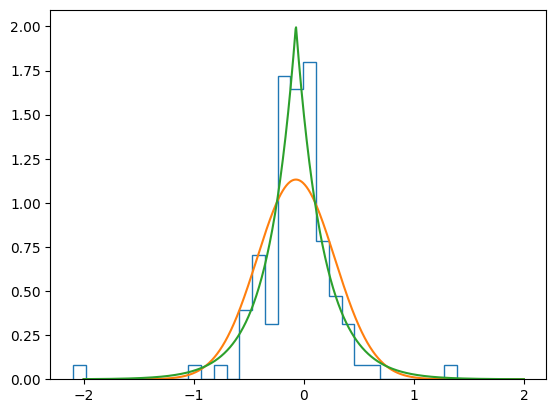

In [139]:
x = np.linspace(-2, 2, 1000)

plt.hist(A_cross_int, 30, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A_cross_int.mean(), A_cross_int.std()))
plt.plot(x, st.laplace.pdf(x, A_cross_int.mean(), A_cross_int.std()/2**0.5))
# plt.yscale("log")
plt.show()

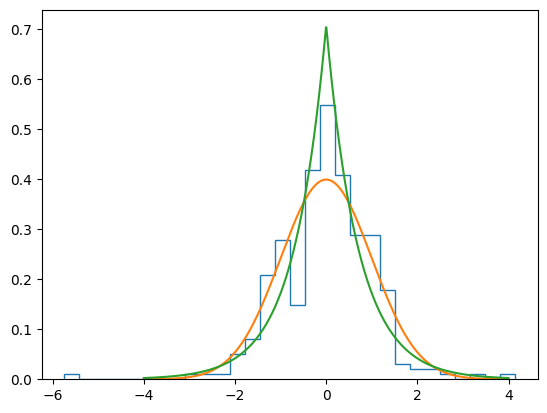

In [143]:
A2 = np.concatenate(((A-A.mean())/A.std(), (A_cross_int-A_cross_int.mean())/A_cross_int.std()))

x = np.linspace(-4, 4, 1000)

plt.hist(A2, 30, histtype="step", density=True)
plt.plot(x, st.norm.pdf(x, A2.mean(), A2.std()))
plt.plot(x, st.laplace.pdf(x, A2.mean(), A2.std()/2**0.5))

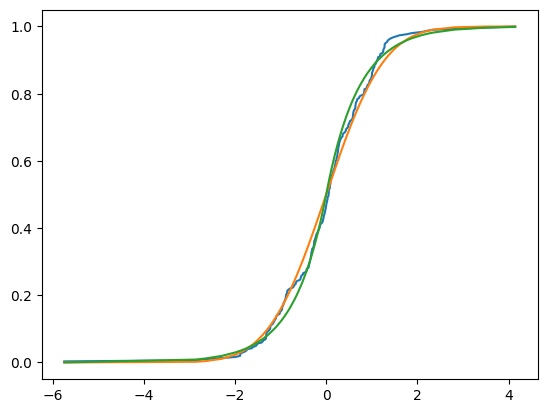

KS statistic, normal: 0.06790854759661685
KS statistic, laplace: 0.06358144252538209
LL, normal: -432.77625262742515
LL, laplace: -423.71584411041215
Bayes factor = exp(ll_laplace-ll_normal): 8607.66631400302


In [142]:
plt.plot(np.sort(A2), (np.arange(len(A2))+1)/len(A2))

plt.plot(np.sort(A2), st.norm.cdf(np.sort(A2)))
plt.plot(np.sort(A2), st.laplace.cdf(np.sort(A2), 0, 1/2**0.5))
plt.show()

print("KS statistic, normal:", np.abs((np.arange(len(A2))+1)/len(A2)-st.norm.cdf(np.sort(A2), A2.mean(), A2.std())).max())
print("KS statistic, laplace:", np.abs((np.arange(len(A2))+1)/len(A2)-st.laplace.cdf(np.sort(A2), A2.mean(), A2.std()/2**0.5)).max())

ll_norm = -((A2-A2.mean())**2/(2*A2.var())).sum()-0.5*len(A2)*np.log(2*np.pi*A2.var())
ll_laplace = -(np.abs(A2-A2.mean())/(A2.std()/2**0.5)).sum()-len(A2)*np.log(A2.std()*2**0.5)

print("LL, normal:", ll_norm)
print("LL, laplace:", ll_laplace)

print("Bayes factor = exp(ll_laplace-ll_normal):", np.exp(ll_laplace-ll_norm))